<h1><b><center>Assignment 02
<br><hr>

<h2><b><Center>
Name    :   Mustafa<br>
Roll-No :   22P-9221<br>
Section :   BCS-6C<br><hr>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [10]:
df = pd.read_csv("total_data_na.csv")
df.head()


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [11]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    object 
 22  X4

,Mat.x,Inns.x,NO,Runs.x,HS,BF,SR.x,X100,X50,X4s,...,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Econ,X4w,X5w,y
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.0
mean,7.286713,6.013986,1.251748,132.349650,33.153846,95.027972,93.120280,0.034965,0.706294,11.461538,...,5.608392,5.006993,16.047552,137.230769,4.629371,0.0,6.158322,0.055944,0.006993,0.0
std,6.077692,5.499022,1.629259,175.482243,31.969684,120.286919,67.202818,0.219236,1.447836,16.706147,...,5.641939,5.387121,18.820205,153.662732,5.909742,0.0,4.679642,0.308933,0.083624,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,7.000000,5.000000,1.000000,52.000000,27.000000,41.000000,117.020000,0.000000,0.000000,3.000000,...,4.000000,3.000000,7.000000,82.000000,2.000000,0.0,7.860000,0.000000,0.000000,0.0
75%,13.000000,11.000000,2.000000,202.000000,53.500000,152.500000,140.595000,0.000000,1.000000,17.000000,...,10.000000,8.500000,28.000000,243.500000,7.500000,0.0,9.500000,0.000000,0.000000,0.0
max,17.000000,17.000000,9.000000,735.000000,128.000000,516.000000,300.000000,2.000000,8.000000,68.000000,...,17.000000,17.000000,68.000000,547.000000,24.000000,0.0,16.950000,3.000000,1.000000,0.0


In [19]:

players = df['PLAYER']
X = df.drop(columns=['PLAYER'])

X = X.replace('-', np.nan)

X = X.apply(pd.to_numeric, errors='coerce')


X.fillna(0, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Missing values:\n", X.isnull().sum())

Missing values:
 Mat.x      0
Inns.x     0
NO         0
Runs.x     0
HS         0
Avg.x      0
BF         0
SR.x       0
X100       0
X50        0
X4s        0
X6s        0
Mat.y      0
Inns.y     0
Ov         0
Runs.y     0
Wkts       0
BBI        0
Avg.y      0
Econ       0
SR.y       0
X4w        0
X5w        0
y          0
Cluster    0
dtype: int64


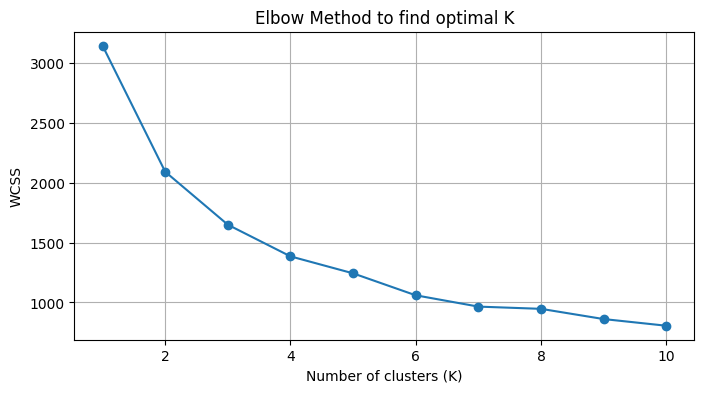

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to find optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [15]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df[['PLAYER', 'Cluster']].head()


,PLAYER,Cluster
0,Aaron Finch,0
1,AB de Villiers,1
2,Abhishek Sharma,0
3,Ajinkya Rahane,1
4,Alex Hales,0


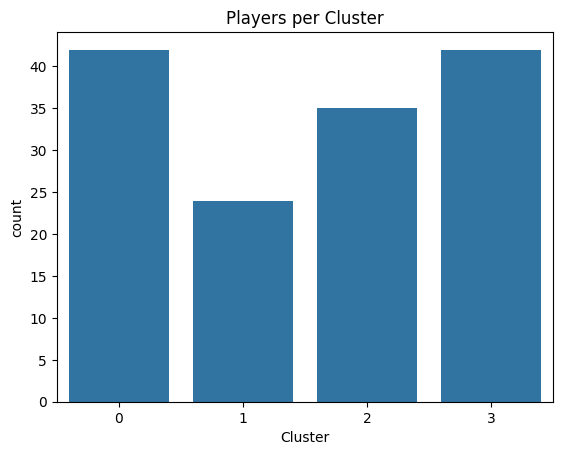


Cluster 0


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
51,Mandeep Singh,14,13,3,252,47,25.2,186,135.48,0,...,0,0,0,0,0.0,0,0,0,0,0
65,Prithvi Shaw,9,9,0,245,65,27.22,160,153.12,0,...,0,0,0,0,0.0,0,0,0,0,0
68,Rahul Tripathi,12,12,3,226,80,25.11,167,135.32,0,...,0,0,0,0,0.0,0,0,0,0,0
87,Shubman Gill,13,11,5,203,57,33.83,139,146.04,0,...,0,0,0,0,0.0,0,0,0,0,0
66,Quinton de Kock,8,8,0,201,53,25.12,162,124.07,0,...,0,0,0,0,0.0,0,0,0,0,0



Cluster 1


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
42,Kane Williamson,17,17,3,735,84,52.5,516,142.44,0,...,0,0,0,0,0.00,0,0,0,0,1
73,Rishabh Pant,14,14,1,684,128,52.61,394,173.60,1,...,0,0,0,0,0.00,0,0,0,0,1
48,Lokesh Rahul,14,14,2,659,95,54.91,416,158.41,0,...,0,0,0,0,0.00,0,0,0,0,1
5,Ambati Rayudu,16,16,2,602,100,43,402,149.75,1,...,0,0,0,0,0.00,0,0,0,0,1
80,Shane Watson,15,15,1,555,117,39.64,359,154.59,2,...,251,6,0,41.83,8.96,28,0,0,0,1



Cluster 2


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
89,Sunil 0rine,16,16,0,357,75,22.31,188,189.89,0,...,467,17,0,27.47,7.65,21.52,0,0,0,2
6,Andre Russell,16,14,3,316,88,28.72,171,184.79,0,...,355,13,0,27.3,9.38,17.46,0,0,0,2
62,Nitish Ra0,15,15,2,304,59,23.38,232,131.03,0,...,44,4,0,11,7.13,9.25,0,0,0,2
33,Hardik Pandya,13,13,4,260,50,28.88,195,133.33,0,...,381,18,0,21.16,8.92,14.22,0,0,0,2
98,Yusuf Pathan,15,13,4,260,45,28.88,200,130.00,0,...,14,1,0,14,7.00,12,0,0,0,2



Cluster 3


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
22,Dan Christian,4,3,1,26,13,13,33,78.78,0,...,101,4,0,25.25,8.53,17.75,0,0,0,3
93,Tom Curran,5,4,1,23,18,7.66,28,82.14,0,...,118,6,0,19.66,11.60,10.16,0,0,0,3
59,Mohammad 0bi,2,2,0,18,14,9,12,150.00,0,...,47,1,0,47,9.40,30,0,0,0,3
17,Chris Woakes,5,4,2,17,11,8.5,19,89.47,0,...,190,8,0,23.75,10.36,13.75,0,0,0,3
20,Corey Anderson,3,3,0,17,15,5.66,22,77.27,0,...,115,3,0,38.33,13.26,17.33,0,0,0,3


In [ ]:
sns.countplot(x='Cluster', data=df)
plt.title("Players per Cluster")
plt.show()

for c in range(k):
    print(f"\nCluster {c}")
    display(df[df['Cluster'] == c].sort_values(by='Runs.x', ascending=False).head(5))


In [ ]:
team = []

openers = df[df['Cluster'] == 0].sort_values('Runs.x', ascending=False).head(2)
middle_order = df[df['Cluster'] == 1].sort_values('Runs.x', ascending=False).head(3)
all_rounders = df[df['Cluster'] == 2].sort_values('Avg.y', ascending=False).head(3)
bowlers = df[df['Cluster'] == 3].sort_values('Wkts', ascending=False).head(4)

team_df = pd.concat([openers, middle_order, all_rounders, bowlers]).drop_duplicates()
team_df[['PLAYER', 'Runs.x', 'Wkts', 'Cluster']]


,PLAYER,Runs.x,Wkts,Cluster
51,Mandeep Singh,252,0,0
65,Prithvi Shaw,245,0,0
42,Kane Williamson,735,0,1
73,Rishabh Pant,684,0,1
48,Lokesh Rahul,659,0,1
9,Ben Cutting,96,2,2
8,Axar Patel,80,3,2
18,Colin de Grandhomme,131,2,2
138,Siddarth Kaul,0,21,3
140,Umesh Yadav,0,20,3
